# ResNet50 Model | AI-Art


In [1]:
from keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
from keras.applications import ResNet50
from keras.optimizers import Adam
from utils import (
    build_sequential_model,
    load_augmented_data,
    plot_performance_curves,
    save_model_history,
    load_model_history,
)
import PIL

PIL.Image.MAX_IMAGE_PIXELS = None

In [2]:
model_name = "resnet_model_ai_art"
dataset_base_path = "./datasets/AI art/"

# Forcefully train the model
force_model_train = False

# Don't save the model
no_save = False

In [3]:
# Load saved model and its history
model_history_loaded, classifier, history = load_model_history(model_name)

Model/history not found.


In [4]:
# Building model
if not model_history_loaded:
    classifier = build_sequential_model(
        layers=[
            ResNet50(weights="imagenet", include_top=False, input_shape=(32, 32, 3)),
            GlobalAveragePooling2D(),
            Dense(1024, "relu"),
            BatchNormalization(),
            Dense(512, "relu"),
            BatchNormalization(),
            Dense(256, "relu"),
            BatchNormalization(),
            Dropout(0.2),
            Dense(2, "softmax"),
        ],
        optimizer=Adam(learning_rate=0.001),
        loss="categorical_crossentropy",
        metrics=["accuracy"],
    )

In [5]:
# Model summary
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1, 1, 2048)        23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1024)              2098176   
                                                                 
 batch_normalization (BatchN  (None, 1024)             4096      
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 batch_normalization_1 (Batc  (None, 512)              2

In [6]:
# Load augmented image generators
train_generator, validation_generator = load_augmented_data(dataset_base_path)

Found 17307 images belonging to 2 classes.
Found 4328 images belonging to 2 classes.


In [7]:
# Train model
if not model_history_loaded or force_model_train:
    history = classifier.fit(
        train_generator,
        epochs=10,
        validation_data=validation_generator,
    )
    history = history.history

Epoch 1/10
   3/1731 [..............................] - ETA: 2:00 - loss: 0.8926 - accuracy: 0.6667    

d:\Programs\anaconda3\envs\tf-gpu\lib\site-packages\PIL\Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


1731/1731 [==============================] - 437s 241ms/step - loss: 0.5109 - accuracy: 0.8033 - val_loss: 0.5080 - val_accuracy: 0.8258
Epoch 2/10
1731/1731 [==============================] - 274s 158ms/step - loss: 0.4568 - accuracy: 0.8183 - val_loss: 1.2558 - val_accuracy: 0.8209
Epoch 3/10
1731/1731 [==============================] - 278s 161ms/step - loss: 0.4609 - accuracy: 0.8145 - val_loss: 0.7680 - val_accuracy: 0.8191
Epoch 4/10
1731/1731 [==============================] - 278s 160ms/step - loss: 0.4654 - accuracy: 0.8212 - val_loss: 1.7245 - val_accuracy: 0.8290
Epoch 5/10
1731/1731 [==============================] - 277s 160ms/step - loss: 0.4630 - accuracy: 0.8202 - val_loss: 0.6483 - val_accuracy: 0.8353
Epoch 6/10
1731/1731 [==============================] - 276s 160ms/step - loss: 0.4539 - accuracy: 0.8210 - val_loss: 0.7062 - val_accuracy: 0.8269
Epoch 7/10
1731/1731 [==============================] - 278s 161ms/step - loss: 0.4460 - accuracy: 0.8219 - val_loss: 0.429

In [8]:
# Save model
if not model_history_loaded or (force_model_train and not no_save) or not no_save:
    save_model_history(classifier, history, model_name)

INFO:tensorflow:Assets written to: ./models/resnet_model_ai_art/model\assets


INFO:tensorflow:Assets written to: ./models/resnet_model_ai_art/model\assets


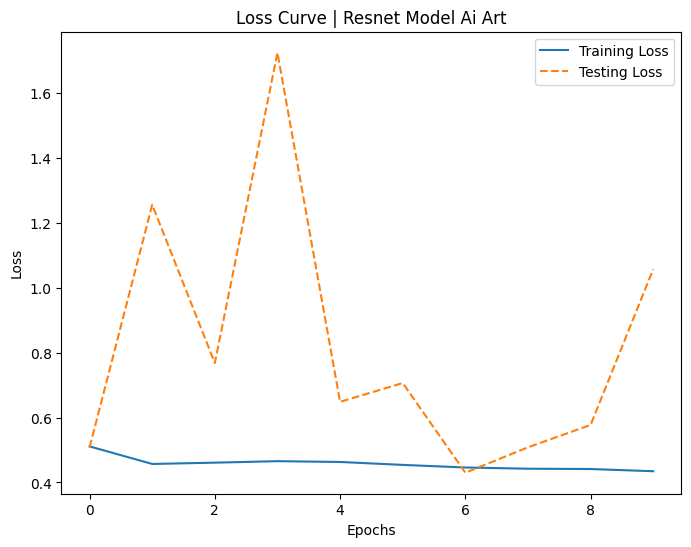

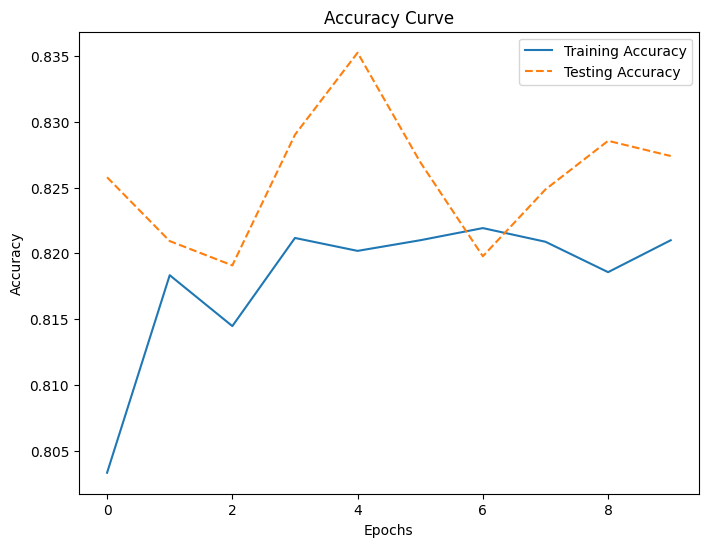

In [9]:
# Plot performance curves
plot_performance_curves(history, model_name)